[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%207/Leçon_7_Demo_grad.ipynb)

# ELE8812 - Segmentation

## Démo :  Détection de contours par gradient

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.ndimage import sobel
from scipy import signal
import math

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (25,10)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/MaloADBA/ELE8812-demos.git Repo

Mounted at /content/drive


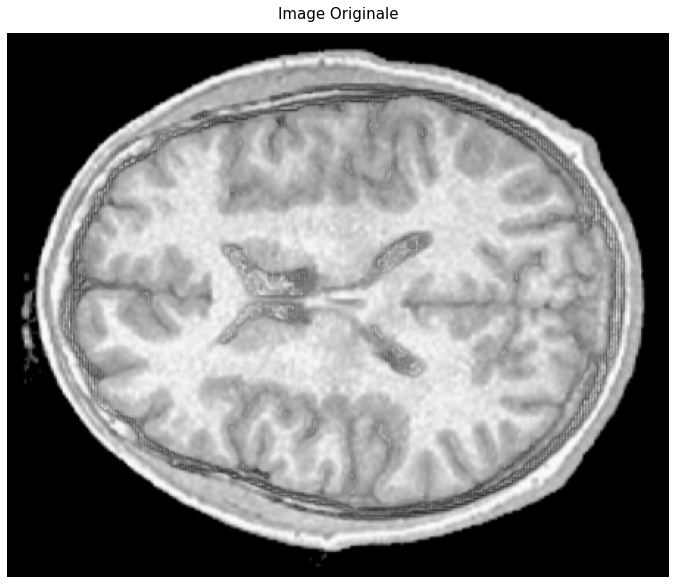

In [3]:
# Charger image
A = plt.imread('Repo/Data/cerveau.tif');
plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

## Nécessité de seuiller

In [4]:
seuil1 = 0.11

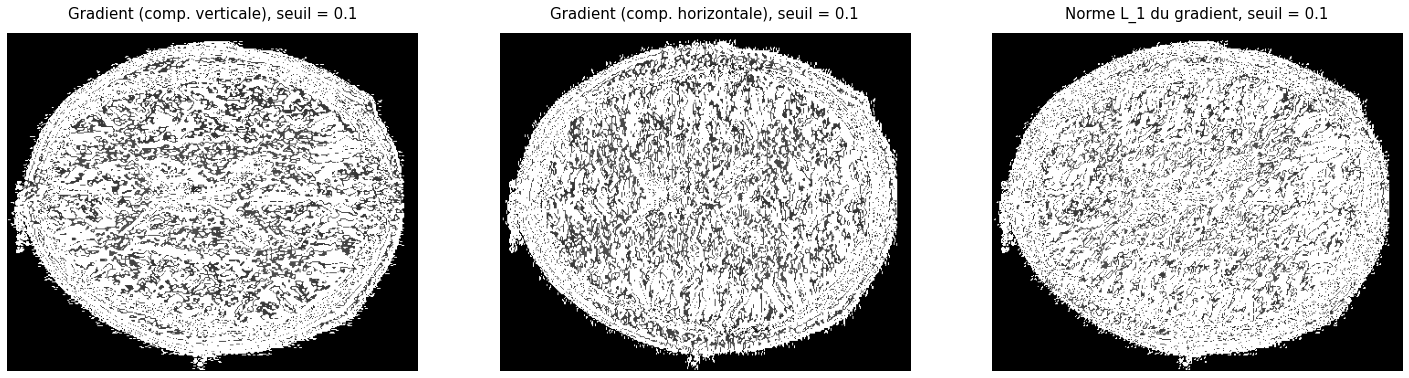

In [5]:
# Calcul gradient vertical, horizontal et magnitude
grad_y = sobel(A, axis=0)
grad_x = sobel(A, axis=1)
mag = np.sqrt(np.abs(grad_x)**2+np.abs(grad_y)**2)


Mgradv = np.max(np.abs(grad_x))
Mgradh = np.max(np.abs(grad_y))
Mgrad = np.max(np.abs(grad_x)+np.abs(grad_y))

BWh = np.abs(grad_y) > (Mgradh * seuil1)
BWv = np.abs(grad_x) > (Mgradv * seuil1)
BW = (np.abs(grad_x)+np.abs(grad_y)) > (Mgrad * seuil1)

fac = 3

imgh = np.minimum(np.double(A)/(256*fac-1) + BWh, 1)
plt.subplot(131)
plt.imshow(imgh, cmap='gray'); plt.title('Gradient (comp. verticale), seuil = 0.1'); plt.axis('off');

imgv = np.minimum(np.double(A)/(256*fac-1) + BWv, 1)
plt.subplot(132)
plt.imshow(imgv, cmap='gray'); plt.title('Gradient (comp. horizontale), seuil = 0.1'); plt.axis('off');

img =   np.minimum(np.double(A)/(256*fac-1) + BW, 1)
plt.subplot(133)
plt.imshow(img, cmap='gray'); plt.title('Norme L_1 du gradient, seuil = 0.1'); plt.axis('off');

## Effet du seuil

In [9]:
seuil2 = 0.25

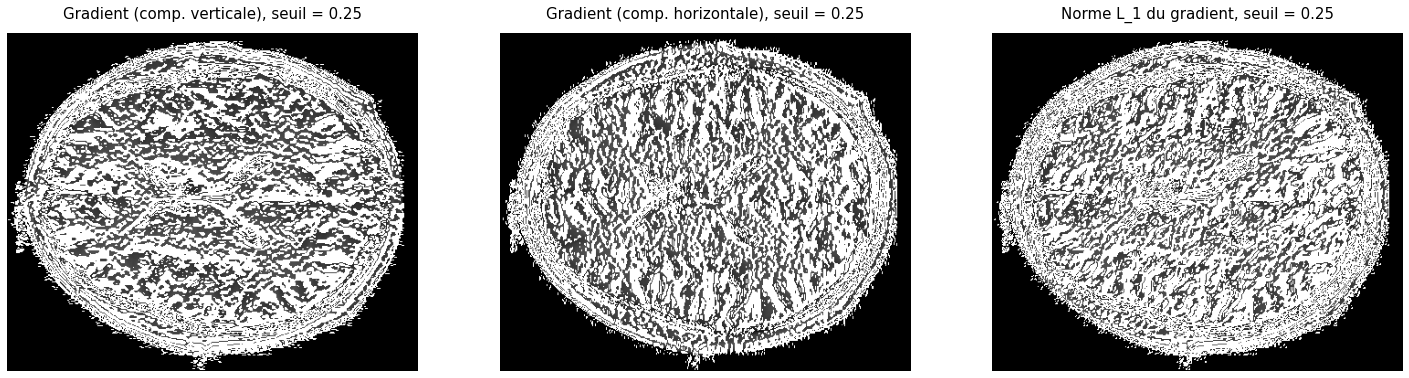

In [7]:
# Calcul gradient vertical et horizontal
grad_y = sobel(A, axis=0)
grad_x = sobel(A, axis=1)


Mgradv = np.max(np.abs(grad_x))
Mgradh = np.max(np.abs(grad_y))
Mgrad = np.max(np.abs(grad_x)+np.abs(grad_y))

BWh = np.abs(grad_y) > (Mgradh * seuil2)
BWv = np.abs(grad_x) > (Mgradv * seuil2)
BW = (np.abs(grad_x)+np.abs(grad_y)) > (Mgrad * seuil2)

fac = 3

imgh = np.minimum(np.double(A)/(256*fac-1) + BWh, 1)
plt.subplot(131)
plt.imshow(imgh, cmap='gray'); plt.title('Gradient (comp. verticale), seuil = 0.25'); plt.axis('off');

imgv = np.minimum(np.double(A)/(256*fac-1) + BWv, 1)
plt.subplot(132)
plt.imshow(imgv, cmap='gray'); plt.title('Gradient (comp. horizontale), seuil = 0.25'); plt.axis('off');

img =   np.minimum(np.double(A)/(256*fac-1) + BW, 1)
plt.subplot(133)
plt.imshow(img, cmap='gray'); plt.title('Norme L_1 du gradient, seuil = 0.25'); plt.axis('off'); plt.show();

## Filtrage au préalable de l'image

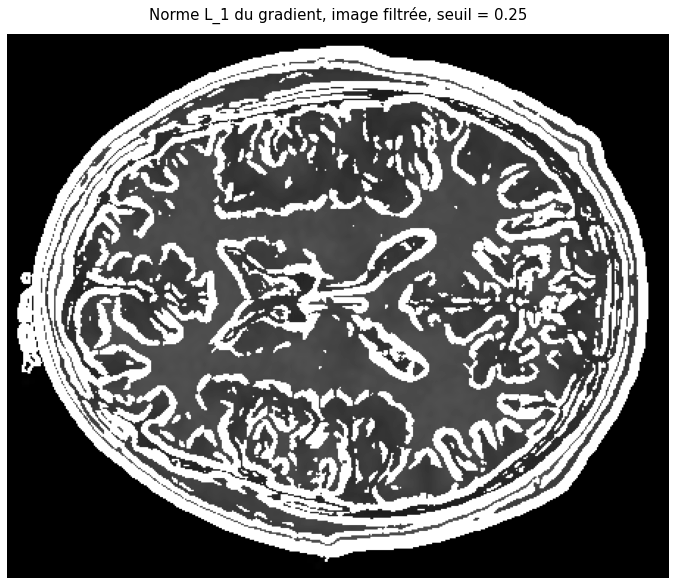

In [10]:
# Convolution avec un filtre moyenneur
h = np.ones((5, 5)) /25
filtered = signal.convolve2d(A,h,mode='same')

grad_y = sobel(filtered, axis=0)
grad_x = sobel(filtered, axis=1)

Mgrad = np.max(np.abs(grad_x)+np.abs(grad_y))
BW = (np.abs(grad_x)+np.abs(grad_y)) > (Mgrad * seuil2)

img =   np.minimum(np.double(filtered)/(256*fac-1) + BW, 1)
plt.imshow(img, cmap='gray'); plt.title('Norme L_1 du gradient, image filtrée, seuil = 0.25'); plt.axis('off'); plt.show();